# Generating Phylogenic Tree

## Align Sequences and Download Tools Needed 

In terminal we have to align the sequences using muscle:
If you haven’t already, examine the contents of the input and output of this command. What do you notice?   
    
    cd lab2
    cd bioe131 #now in the folder where I my files are
    muscle –in seq.fa –out seq.aligned.fa 
   #use muscle to input (-in) a fasta file and output (-out) a fasta file containing metadata about alignment 
    
Now that we have our aligned sequence file we can generate a tree: 
    
    fasttree –nt < seq.aligned.fa > tree.nwk
#use fasttree tool, specify aligning nucleotides (-nt), direct it to the input file containing the alignment data, then specifiy the format we want the tree to be in (nwk = newick)   
    
Use terminal to install BioPython:

    pip3 install biopython
   #use pip3 to install the module Bio




## Drawing the Tree

In [97]:
#using Bio.phylo to draw a phylogenic tree:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

from Bio import Phylo

%matplotlib inline 
#allows us to plot in the cell

tree = Phylo.read("tree.nwk", "newick") #use read function from Phylo module that has two arguments: 
                                        #file_object_name and format

Phylo.draw_ascii(tree) #Phylo.draw() function allows the tree to be drawn 
#decided to use _ascii because I can read the sequence names better to idenify smaples in the clusters

 , hu.39
 |
 | rh.50
 |
 , rh.57
 |
 | rh.51
 |
 | rh.49
 |
_, rh.53
 |
 | rh.64
 |
 , rh.61
 |
 |, rh.58
 ||
 ||                              , pi.2
 ||          ____________________|
 ||         |                    |, pi.3
 ||         |                    ||
 ||         |                     | pi.1
 ||         |
 ||         |           , rh.10
 ||        _|          ,|
 ||       | |          ||, bb.1
 ||       | |          |||
 ||       | |   _______| | bb.2
 ||       | |  |       |
 ||       | |  |       | _ hu.17
 ||       | |  |       ||
 ||       | |__|        | hu.6
 ||       |    |
 ||       |    |    ______ rh.2
 ||       |    |   |
 ||       |    |___|         __ rh.40
 ||       |        |        |
 ||       |        |________|, hu.67
 ||       |                 ||
 ||       |                 |, hu.37
 ||       |                  |
 ||       |                  |, hu.40
 ||       |                  ||
 ||       |                  || hu.66
 ||       |                  ||
 ||  

### Analyzing the Tree: 
The samples hu.39, rh.50, rh.57, rh.51, rh.49, rh.53, rh.64 seem to all be outliers from the tree. They were used in analysis, but dont seem to be very far evolutionary from most of the samples. 

It seems that there was an early evolutionary split that seperate the two other clusters. 

The bottom cluster seems to have more evolutionary distance from the other clusters, and also has another evolutionary split early in their history, splitting the clade into sub-clades 

rh.52 seems to be another outgroup from the rest of the samples.

# Identifying Sequences by BLAST: 

In [73]:
#get an arbitrary representitive taxon from following clusters: 

#top cluster: hu.39, middle: bb.1, bottom: cy.2  

#print sequences:
my_recs = []
for seq_rec in SeqIO.parse("seq.fa", "fasta"):
    my_recs.append(seq_rec)

In [84]:
print(my_recs[12].seq) #hu.39


atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataatcacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccgtcaccacagcgttcccccgactcctccacgggcatcggcaagaaaggccagcagcccgccagaaagagactcaatttcggtcggactggcgactcagagtcagtccccgaccctcaacctatcggagaacctccagcagcgccctctagtgtgggatctggtacaatggctgcaggcggtggcgcaccaatggcagacaataacgaaggtgccgacggagtgggtagttcctcgggaaattggcattgcgattccacatggctgggcgacagagttatcaccaccagcacccgaacctgggccctgcccacctacaacaaccacctctacaagcaaatctccaacgggacctcgggaggcagcaccaacgacaacacctactttggctacagcaccccctgggggtatcttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagactcagcttcaagctcttcaacatccaggtcaaagaggtcacgcagaatgaaggcaccaaga

In [75]:
print(my_recs[0].seq) #bb.1

atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggcgctgaaacctggagccccgaagcccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcggacgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccatcaccccagcgttctccagactccactacgggcatcggcaagaaaggccagcagcccgcgaaaaagagactcaactttgggcagactggcgactcagagtcagtgcccgaccctcaaccaatcggagaaccccccgcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctccccacctacaacaaccacctctacaagcaaatctccaacgggacttcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagactcaacttcaagctcttcaacatccaggtcaaggaggtcacgcagaatgaaggcaccaaga

In [76]:
print(my_recs[2].seq) #cy.2

atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacaacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaatgcgggtgacaacccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcatttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctgcaaagaagagaccggtagagccgtcacctcagcgttcccccgactcctccacgggcatcggcaagaagggccagcagcccgccagaaagagactcaatttcggtcagactggcgactcagagtcagtccccgaccctcaacctctcggagaacctccagcagcgccctctagtgtgggatctggtacagtggctgcaggcggtggcgcaccaatggcagacaataacgaaggtgccgacggagtgggtaatgcctcaggaaattggcattgcgattccacatggctgggcgacagagtcattaccaccagcacccgaacctgggccctgcccacctacaacaaccacctctacgagcaaatctccagtgaaactgcaggtagtaccaacgacaacacctacttcggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagaagctgcggttcaagctcttcaacatccaggtcaaggaggtcacgacgaatgacggcgttacgacca

### Blasting the Representitive Sequences in Blastn

#### Top Cluster
hu.39: Adeno-associated virus isolate hu.39 capsid protein VP1 (cap) gene, complete cds; Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds; Adeno-associated virus isolate rh.64 capsid protein VP1 (cap) gene, complete cds 

#### Middle Cluster
bb.1: Non-human primate Adeno-associated virus isolate AAVbb.1 capsid protein (VP1) gene, complete cds; Non-human primate Adeno-associated virus isolate AAVbb.2 capsid protein (VP1) gene, complete cds; Non-human primate Adeno-associated virus isolate AAVrh.10 capsid protein (VP1) gene, complete cds

#### Bottom Cluster
cy.2: Non-human primate Adeno-associated virus isolate AAVcy.2 capsid protein (VP1) gene, complete cds; Adeno-associated virus 7 nonstructural protein and capsid protein genes, complete cds; Adeno-associated virus isolate Anc113 capsid protein (VP1) gene, complete cds

They all seem to be from Adeno-associated virus gene from viruses that infect different hosts. They are all caspid genes. None of the samples we entered into BLAST were a different virus/gene.

We may not trust the BLAST annotations because a few of the genes that we matched were incomplete coding sequences, therefore the annotations may not be accurate due to the missing sections 

Notebook: 

Copy and paste any terminal commands you used into a Markdown section and explain what the input was, what the tool did, and what the output was. Plot any results in-line and explain them.

An iPython notebook containing youranalysis is due at the beginning of lab section next week. Please upload your .ipynb file to bCourses.

# Calculating Sequence Statistics for Clusters

## Barplots of GC and AT probability for position

In [ ]:
#calculate at content of aligned sequences
aseqs= "seq.aligned.fa"
alignedseq = []
for seq in SeqIO.parse("seq.aligned.fa", "fasta"):
    alignedseq.append(seq)

#Functions to return the percentange of samples with an a/t or g/t at a specific nt position 
dictofsamples = SeqIO.to_dict(SeqIO.parse("seq.aligned.fa", "fasta"))
def at_content(listofsamples, position_num):
    count = 0
    length = len(listofsamples)
    for name in listofsamples:
        temp = dictofsamples[name].seq
        if temp[position_num] == 'A' or temp[position_num] == 'T':
            count += 1
    return count / length

def gc_content(listofsamples, position_num):
    return 1 - at_content(listofsamples, position_num)

### Top Cluster Analysis

Text(0,0.5,'%AT or %GC')

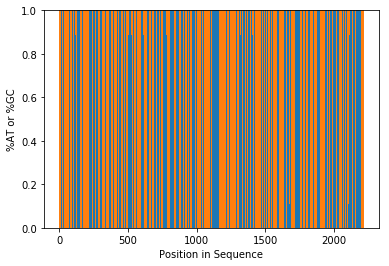

In [88]:
#TOP CLUSTER ANALYSIS
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
#indexed samples of top
topcluster = ["hu.39", "rh.50", "rh.57","rh.51", 'rh.49', 
              "rh.53", 'rh.64', "rh.61", 'rh.58']

#Functions to return the percentange of samples with an a/t or g/t at a specific nt position 
dictofsamples = SeqIO.to_dict(SeqIO.parse("seq.aligned.fa", "fasta"))
def at_content(listofsamples, position_num):
    count = 0
    length = len(listofsamples)
    for name in listofsamples:
        temp = dictofsamples[name].seq
        if temp[position_num] == 'A' or temp[position_num] == 'T':
            count += 1
    return count / length

def gc_content(listofsamples, position_num):
    return 1 - at_content(listofsamples, position_num)

#generate data for barplot top

tpos_list= range(1,len(dictofsamples["hu.39"].seq)

pat_top= [at_content(topcluster, x) for x in tpos_list]
pgc_top = [gc_content(topcluster, x) for x in tpos_list]

#graph data 
import matplotlib.pyplot as plt
%matplotlib inline

#Top Cluster
attop_out = plt.bar (tpos_list, pat_top, 1)
gctop_out = plt.bar(tpos_list,pgc_top, 1, bottom= pat_top)
plt.xlabel("Position in Sequence") 
plt.ylabel("%AT or %GC")





### Analysis of Top AT-GC Content:

It seems that the sequences are very similar because the bases seem to be all AT or GC.

### Middle Cluster Analysis

Text(0,0.5,'%AT or %GC')

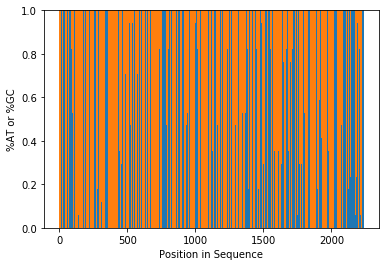

In [93]:
#MIDDLE CLUSTER ANALYSIS
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
#indexed samples of middle
middlecluster = ['pi.2', 'pi.3', 'pi.1', 'rh.10', 'bb.1',
                 'bb.2', 'hu.17', 'hu.6', 'rh.2', 'rh.40',
                 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41',
                 'rh.38', 'hu.42']

#Functions to return the percentange of samples with an a/t or g/t at a specific nt position 
dictofsamples = SeqIO.to_dict(SeqIO.parse("seq.aligned.fa", "fasta"))
def at_content(listofsamples, position_num):
    count = 0
    length = len(listofsamples)
    for name in listofsamples:
        temp = dictofsamples[name].seq
        if temp[position_num] == 'A' or temp[position_num] == 'T':
            count += 1
    return count / length

def gc_content(listofsamples, position_num):
    return 1 - at_content(listofsamples, position_num)

#generate data for barplot middle
mpos_list= range(1,len(dictofsamples["pi.2"].seq))

pat_middle = [at_content(middlecluster, x) for x in mpos_list]
pgc_middle = [gc_content(middlecluster, x) for x in mpos_list]

#graph data 
import matplotlib.pyplot as plt
%matplotlib inline

atmiddle_out = plt.bar (mpos_list, pat_middle, 1)
gcmiddle_out = plt.bar(mpos_list,pgc_middle, 1, bottom= pat_middle)
plt.xlabel("Position in Sequence") 
plt.ylabel("%AT or %GC")


### Analysis of Middle AT-GC Content:

There is greater variation in AT or GC in this cluster, but the very begining seems to be conserved

### Bottom Cluster Analysis

Text(0,0.5,'%AT or %GC')

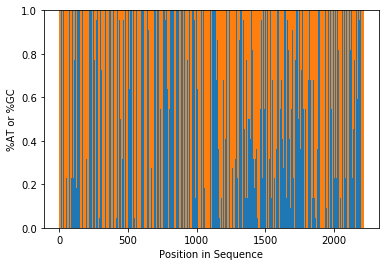

In [92]:
#BOTTOM CLUSTER ANALYSIS
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
#indexed samples of bottom
bottomcluster= ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13',
                'rh.35', 'rh.36', 'rh.37', 'cy.2', 'rh.54',
                'rh.55', 'rh.48', 'rh.62', 'hu.43', 'hu.48',
                'hu.44', 'hu.46', 'hu.14', 'hu.31', 'hu.32',
                'rh.43', 'rh.52']

#Functions to return the percentange of samples with an a/t or g/t at a specific nt position 
dictofsamples = SeqIO.to_dict(SeqIO.parse("seq.aligned.fa", "fasta"))
def at_content(listofsamples, position_num):
    count = 0
    length = len(listofsamples)
    for name in listofsamples:
        temp = dictofsamples[name].seq
        if temp[position_num] == 'A' or temp[position_num] == 'T':
            count += 1
    return count / length

def gc_content(listofsamples, position_num):
    return 1 - at_content(listofsamples, position_num)

#generate data for barplot bottom
bpos_list= range(1,2217) #checked with code further down to find that this was the longest sequence in this cluster

pat_bottom = [at_content(bottomcluster, x) for x in bpos_list]
pgc_bottom = [gc_content(bottomcluster, x) for x in bpos_list]

#graph data 
import matplotlib.pyplot as plt
%matplotlib inline

atbottom_out = plt.bar (bpos_list, pat_bottom, 1)
gcbottom_out = plt.bar(bpos_list,pgc_bottom, 1, bottom= pat_bottom)

plt.xlabel("Position in Sequence") 
plt.ylabel("%AT or %GC")

### Analysis of Bottom AT-GC Content:

There seems to be a higher content of AT in these samples than the other clusters, but positions seem to be pretty conserved on wether AT or GC.

## Boxplots of Cluster Sequence Length

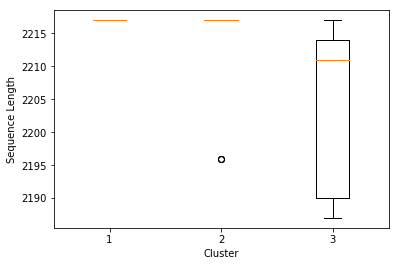

In [71]:
#generate a boxplot of sequence lengths:

from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

#generating a dictionary with sequence names and sequences even though parsing and using record.seq prob would work 
id_seqs = {}
names = []
seqs = []

f = open("seq.aligned.fa", 'r')
for line in f:
    if line.startswith('>'):
        names.append(line[1:-1])
f.close()

for record in SeqIO.parse("seq.aligned.fa", "fasta"):
    seqs.append(record.seq)
id_seqs = dict(zip(names, seqs))

#generating data by finding the length of the sequences in each cluster

#function that finds the length of each sequence in a cluster
def len_of(cluster, id_seq_dict):
    listlen = []
    for idname in cluster:
        matchid = id_seq_dict[idname]
        count = matchid.count('A') + matchid.count('T') + matchid.count('G') + matchid.count('C')
        listlen.append(count)
    return listlen

topcluster = ["hu.39", "rh.50", "rh.57","rh.51", 'rh.49', 
              "rh.53", 'rh.64', "rh.61", 'rh.58']
middlecluster = ['pi.2', 'pi.3', 'pi.1', 'rh.10', 'bb.1',
                 'bb.2', 'hu.17', 'hu.6', 'rh.2', 'rh.40',
                 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41',
                 'rh.38', 'hu.42']
bottomcluster= ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13',
                'rh.35', 'rh.36', 'rh.37', 'cy.2', 'rh.54',
                'rh.55', 'rh.48', 'rh.62', 'hu.43', 'hu.48',
                'hu.44', 'hu.46', 'hu.14', 'hu.31', 'hu.32',
                'rh.43', 'rh.52']


#running each sample group through the function        
top = len_of(topcluster, id_seqs)  
middle = len_of(middlecluster, id_seqs)  
bottom = len_of(bottomcluster, id_seqs)  


#graphing data

import matplotlib.pyplot as plt
%matplotlib inline

#list of data to be plugged into boxplot
data = [top, middle, bottom]

plt.boxplot(data)

plt.xlabel("Cluster") 
plt.ylabel("Sequence Length")

plt.show()




### Analysis of Sequence Length Boxplot:

The fist cluster is a line because all the sequences are the same length. 

The second cluster is a line with one outlier because all the sequences are the same length except for one.

The third cluster has an adverage between 2210-2215 nucleotides and a pretty large spread, but it seems more sequences are longer than shorter. The minimum sequence is less than 2190 nt long, and the max is greater than 2215.